In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\vivek\OneDrive\Documents\student_scores.csv')
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [54]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [147]:
df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [57]:
df = df.drop("Unnamed: 0", axis=1)
print(df.head())

KeyError: "['Unnamed: 0'] not found in axis"

In [58]:
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


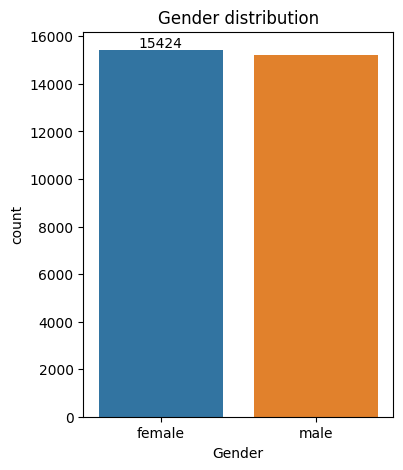

In [141]:
plt.figure(figsize=(4,5))
ax=sns.countplot(data=df,x="Gender",hue="Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender distribution")
plt.show()

In [60]:
gb = df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


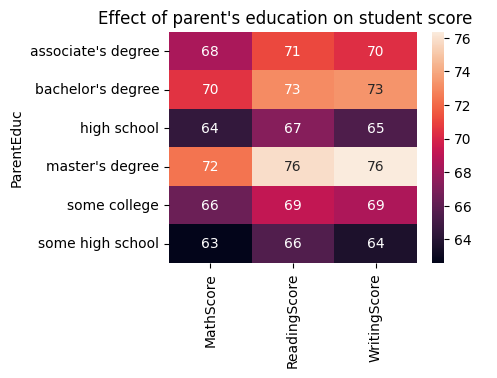

In [143]:
plt.figure(figsize=(4,3))
sns.heatmap(gb,annot=True)
plt.title("Effect of parent's education on student score")
plt.show()

Average Score of student is higher, in order to their parental education
master's >Bachlor's>Some college>High school>Some High school

In [62]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


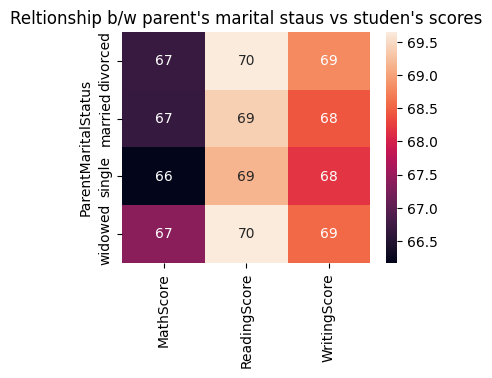

In [63]:
plt.figure(figsize=(4,3))
sns.heatmap(gb1,annot=True)
plt.title("Reltionship b/w parent\'s marital staus vs studen\'s scores")
plt.show()

from the above chart we have concluded there are negligible impact on the student's score due to their parent's marital status(i.e 1-2 scores)

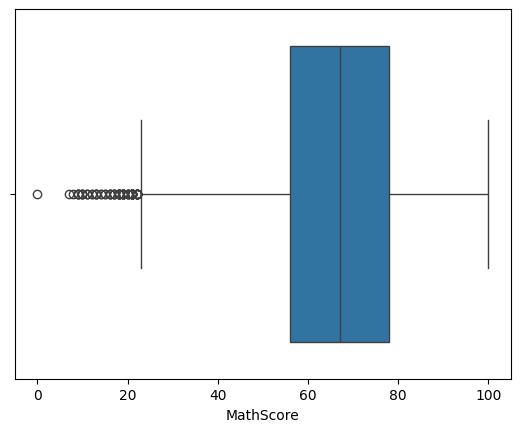

In [64]:
sns.boxplot(data = df,x="MathScore")
plt.show()

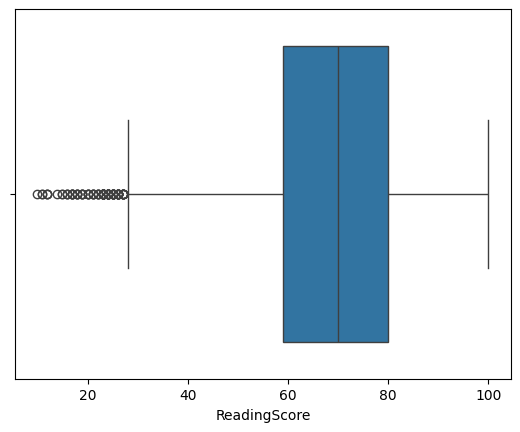

In [65]:
sns.boxplot(data = df,x="ReadingScore")
plt.show()

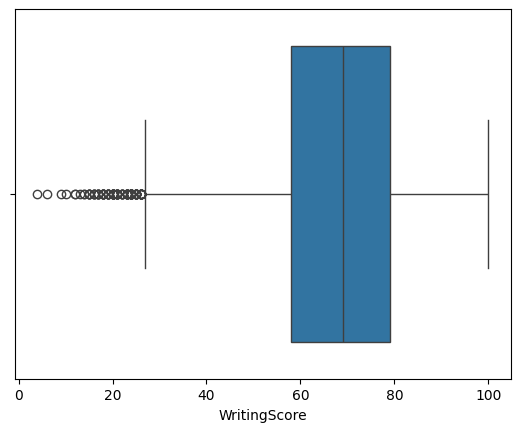

NameError: name 'WritingScore' is not defined

In [144]:
sns.boxplot(data = df,x="WritingScore")
plt.show()

In [67]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


In [76]:
groupA=df.loc[(df["EthnicGroup"]=="group A")].count
print(groupA)

<bound method DataFrame.count of        Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
3        male     group A  associate's degree  free/reduced       none   
13       male     group A        some college      standard  completed   
14     female     group A     master's degree      standard       none   
25       male     group A     master's degree  free/reduced       none   
56       male     group A    some high school  free/reduced       none   
...       ...         ...                 ...           ...        ...   
30603    male     group A         high school      standard       none   
30621  female     group A   bachelor's degree      standard       none   
30622    male     group A  associate's degree  free/reduced  completed   
30627  female     group A         high school      standard  completed   
30634    male     group A  associate's degree  free/reduced  completed   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
3         

In [77]:
groupB=df.loc[(df["EthnicGroup"]=="group B")].count
print(groupB)

<bound method DataFrame.count of        Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
2      female     group B     master's degree      standard       none   
5      female     group B  associate's degree      standard       none   
6      female     group B        some college      standard  completed   
7        male     group B        some college  free/reduced       none   
9      female     group B         high school  free/reduced       none   
...       ...         ...                 ...           ...        ...   
30623  female     group B                 NaN      standard  completed   
30624  female     group B   bachelor's degree      standard  completed   
30628  female     group B                 NaN  free/reduced       none   
30630    male     group B  associate's degree  free/reduced       none   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
2         

In [78]:
groupC=df.loc[(df["EthnicGroup"]=="group C")].count
print(groupC)

<bound method DataFrame.count of        Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
1      female     group C        some college      standard        NaN   
4        male     group C        some college      standard       none   
10       male     group C  associate's degree      standard       none   
15     female     group C    some high school      standard       none   
16       male     group C         high school      standard        NaN   
...       ...         ...                 ...           ...        ...   
30617  female     group C  associate's degree      standard       none   
30620    male     group C   bachelor's degree      standard       none   
30626  female     group C  associate's degree  free/reduced       none   
30633  female     group C     master's degree      standard  completed   
30635    male     group C        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
1         

In [79]:
groupD=df.loc[(df["EthnicGroup"]=="group D")].count
print(groupD)

<bound method DataFrame.count of        Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
8        male     group D         high school  free/reduced  completed   
11       male     group D  associate's degree      standard       none   
20       male     group D         high school      standard       none   
22       male     group D                 NaN      standard       none   
24       male     group D                 NaN  free/reduced  completed   
...       ...         ...                 ...           ...        ...   
30619  female     group D         high school  free/reduced  completed   
30629  female     group D  associate's degree      standard  completed   
30632  female     group D        some college      standard       none   
30636  female     group D         high school      standard       none   
30639  female     group D  associate's degree      standard  completed   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
8         

In [98]:
groupE=df.loc[(df["EthnicGroup"]=="group E")].count
print(groupE)

<bound method DataFrame.count of        Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
31     female     group E     master's degree  free/reduced       none   
33       male     group E        some college      standard       none   
34       male     group E  associate's degree      standard  completed   
42     female     group E  associate's degree  free/reduced       none   
46       male     group E        some college      standard       none   
...       ...         ...                 ...           ...        ...   
30609  female     group E    some high school      standard       none   
30613  female     group E   bachelor's degree  free/reduced  completed   
30618  female     group E         high school      standard  completed   
30631    male     group E    some high school      standard       none   
30637    male     group E         high school      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
31        

In [101]:
groupA=df.loc[(df["EthnicGroup"]=="group A")].count()
print(groupA)



Gender                 2219
EthnicGroup            2219
ParentEduc             2078
LunchType              2219
TestPrep               2081
ParentMaritalStatus    2121
PracticeSport          2167
IsFirstChild           2168
NrSiblings             2096
TransportMeans         1999
WklyStudyHours         2146
MathScore              2219
ReadingScore           2219
WritingScore           2219
dtype: int64
Gender                 5826
EthnicGroup            5826
ParentEduc             5470
LunchType              5826
TestPrep               5488
ParentMaritalStatus    5605
PracticeSport          5704
IsFirstChild           5649
NrSiblings             5546
TransportMeans         5238
WklyStudyHours         5642
MathScore              5826
ReadingScore           5826
WritingScore           5826
dtype: int64
Gender                 9212
EthnicGroup            9212
ParentEduc             8652
LunchType              9212
TestPrep               8652
ParentMaritalStatus    8858
PracticeSport         

In [102]:
groupB=df.loc[(df["EthnicGroup"]=="group B")].count()
print(groupB)


Gender                 5826
EthnicGroup            5826
ParentEduc             5470
LunchType              5826
TestPrep               5488
ParentMaritalStatus    5605
PracticeSport          5704
IsFirstChild           5649
NrSiblings             5546
TransportMeans         5238
WklyStudyHours         5642
MathScore              5826
ReadingScore           5826
WritingScore           5826
dtype: int64


In [103]:
groupC=df.loc[(df["EthnicGroup"]=="group C")].count()
print(groupC)


Gender                 9212
EthnicGroup            9212
ParentEduc             8652
LunchType              9212
TestPrep               8652
ParentMaritalStatus    8858
PracticeSport          9050
IsFirstChild           8929
NrSiblings             8763
TransportMeans         8280
WklyStudyHours         8933
MathScore              9212
ReadingScore           9212
WritingScore           9212
dtype: int64


In [104]:
groupD=df.loc[(df["EthnicGroup"]=="group D")].count()
print(groupD)


Gender                 7503
EthnicGroup            7503
ParentEduc             7056
LunchType              7503
TestPrep               7070
ParentMaritalStatus    7218
PracticeSport          7343
IsFirstChild           7285
NrSiblings             7106
TransportMeans         6713
WklyStudyHours         7270
MathScore              7503
ReadingScore           7503
WritingScore           7503
dtype: int64


In [105]:
groupE=df.loc[(df["EthnicGroup"]=="group E")].count()
print(groupE)

Gender                 4041
EthnicGroup            4041
ParentEduc             3814
LunchType              4041
TestPrep               3804
ParentMaritalStatus    3892
PracticeSport          3954
IsFirstChild           3918
NrSiblings             3820
TransportMeans         3624
WklyStudyHours         3924
MathScore              4041
ReadingScore           4041
WritingScore           4041
dtype: int64


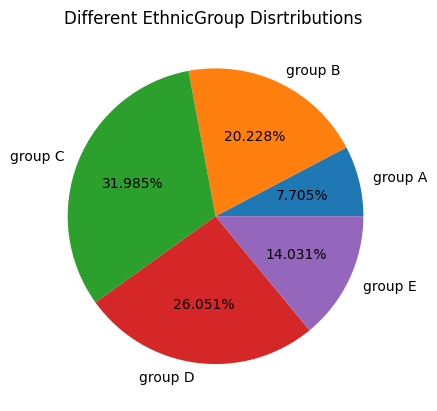

In [113]:
label=["group A","group B","group C","group D","group E"]
l=[ groupA ['EthnicGroup'] , groupB ['EthnicGroup'] , groupC ["EthnicGroup"] , groupD ["EthnicGroup"] , groupE ["EthnicGroup"] ]
plt.pie(l,labels=label,autopct="%1.3f%%")
plt.title("Different EthnicGroup Disrtributions ")
plt.show()

In [114]:
print(l)

[2219, 5826, 9212, 7503, 4041]


[Text(0, 0, '9212')]

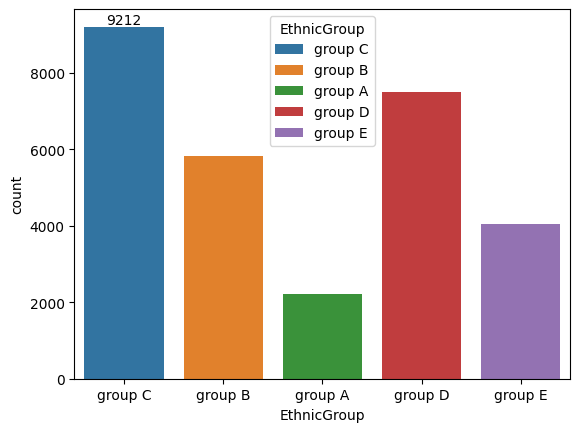

In [134]:
z=sns.countplot(data=df,x="EthnicGroup",hue='EthnicGroup')
z.bar_label(z.containers[0])